# Convolutional neural networks (CNN)

### Convolutional Neural Networks (ConvNets or CNNs) are  Neural Networks with a certain structure that have proven very effective in areas such as image recognition and classification. 

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import torchvision
from torch import nn, optim
from time import time

import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torch import nn, optim
from time import time
from torchvision import datasets, transforms
#import imageio

#Allows showing plots in notebook:
%matplotlib inline

### Getting the data - identical data set and steps that we did in the previous lesson

In [2]:
np.random.seed(42) # For reproducebility


In [3]:
# transform for data normalization
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# transforms.ToTensor() — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.
# transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

#The  numbers 0.5 that are passed to the transform are the mean and the STD that will normalize each image
#image = (image - mean) / std



In [4]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [5]:
print('the number of images in the train set:', len(trainset))
print('the number of images in the validation/test set:', len(valset))

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

the number of images in the train set: 60000
the number of images in the validation/test set: 10000
torch.Size([64, 1, 28, 28])
torch.Size([64])


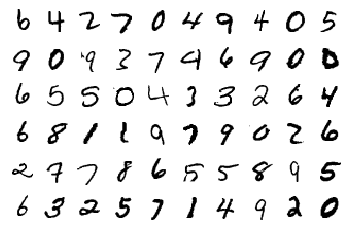

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### define network structure in pytorch 
If you want to learn more see these pytorch tutorials - [1](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), [2](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)


### A typical training procedure for a neural network:

- #### Define the neural network that has some learnable parameters (or weights)
- #### Iterate over a dataset of inputs
- #### Process input through the network
- #### Compute the loss (how far is the output from being correct)
- #### Propagate gradients back into the network’s parameters
- #### Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

## Using a convolutional NN

In [39]:
class cnn_net(nn.Module):
    def __init__(self):
        super(cnn_net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))
#         self.conv2_drop = nn.Dropout2d() #regularization method to prevent overfitting. 
        self.fc1 = nn.Linear(7*7*20, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x) #F.max_pool2d(F.relu(self.conv1(x)),2)
        x = self.conv2(x)
        x = x.view(-1, 7*7*20)
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x)

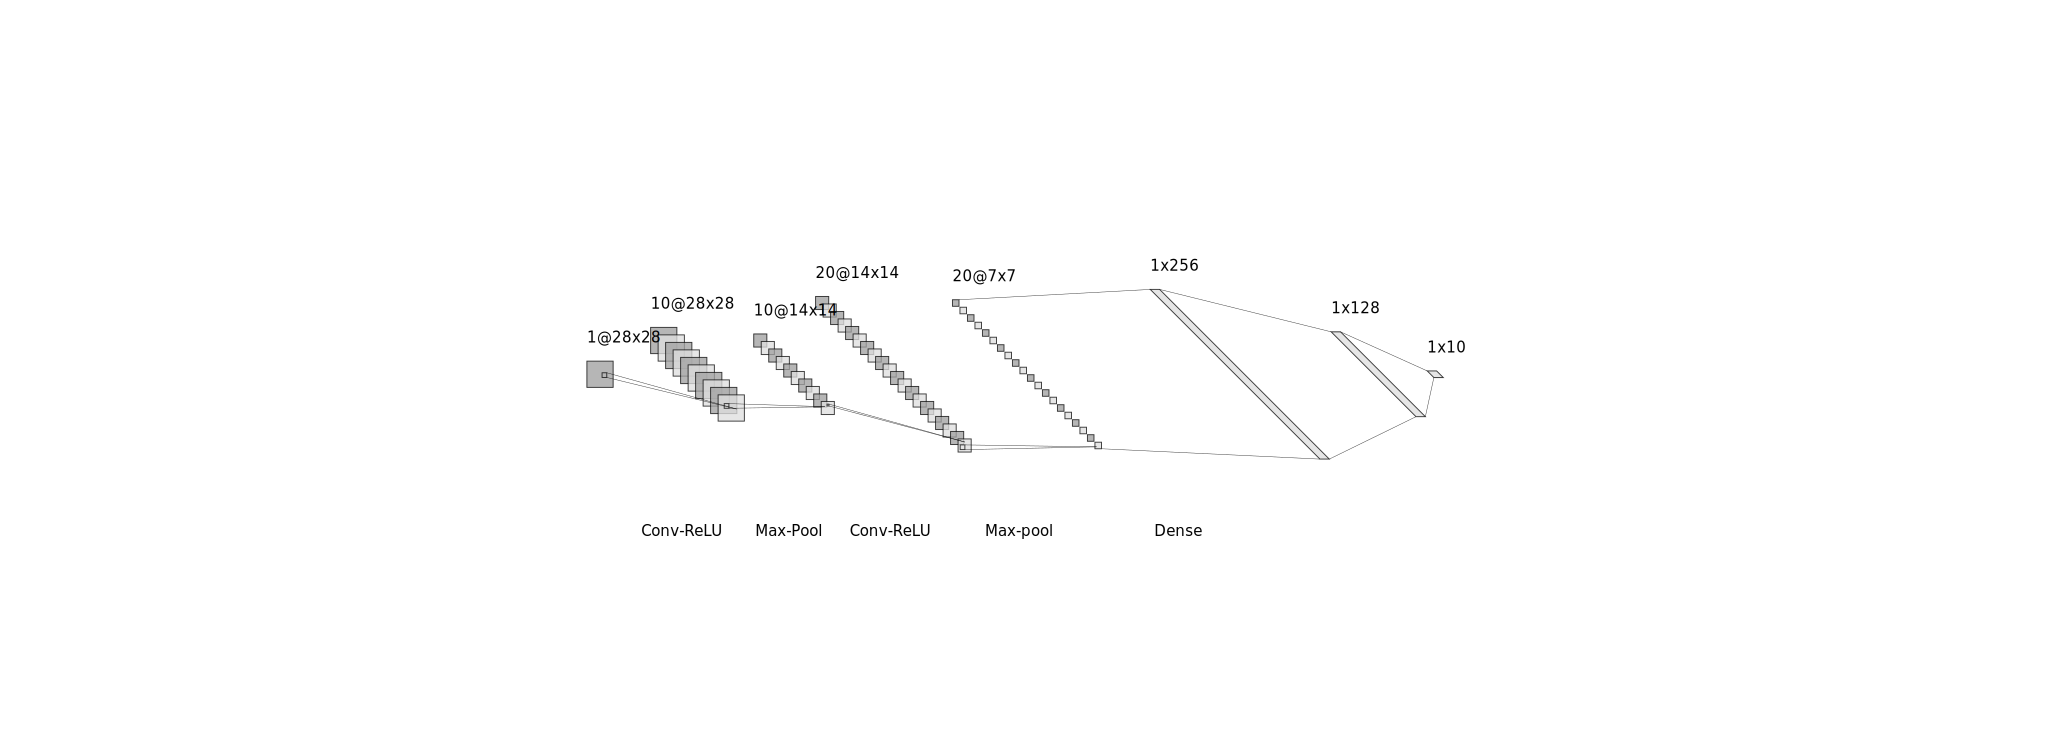

In [40]:
# The plot was created using this website: http://alexlenail.me/ (ALEXANDER LENAIL - MIT PhD student)
from IPython.display import SVG, display
# display(SVG('figs/CNN.svg'))
display(SVG('figs/CNN22.svg'))

### Convolution

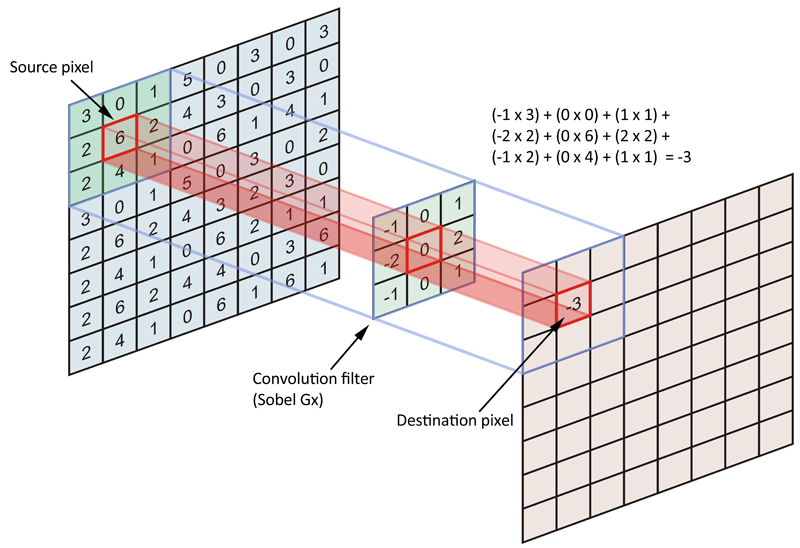

In [41]:
from IPython.display import Image
Image(filename='figs/Convolution_explained.png', width=500) #Source of figure - https://datascience.stackexchange.com/questions/23183/why-convolutions-always-use-odd-numbers-as-filter-size

See also [here](https://algorithmia.com/blog/convolutional-neural-nets-in-pytorch) a great visualization of convolution

### Max Pooling layer

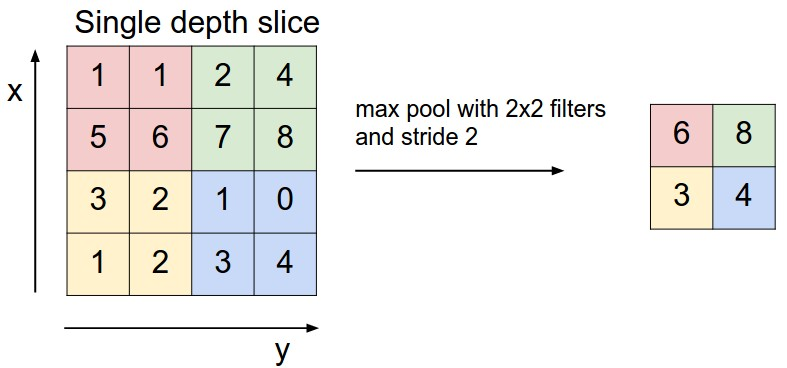

In [42]:
#Image taken from: http://cs231n.github.io/convolutional-networks/
Image(filename='figs/maxpool.jpeg', width=700)



This is just one simple architecture - see other example and great explenations about CNN's here http://cs231n.github.io/convolutional-networks/


## Important parameters in CNN

- ### Kernel Size – the size of the filter.
- ### Stride – the rate at which the kernel passes over the input image. A stride of 2 moves the kernel in 2-pixel increments.
- ### Padding – we can add layers of 0s to the outside of the image in order to make sure that the kernel properly passes over the edges of the image.
- ### Output Layers – how many different kernels are applied to the image

## Dimensions after a convolutional network pytorch

### DimIn $\rightarrow$ DimOut

### where $DimOut = \frac{DimIn - KernelSize + 2*Padding}{Stride} + 1$

In [43]:
log_interval = 100
learning_rate = 0.003
momentum = 0.5

See [here](https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2) if you want to see practical discussion about learning rates of different gradient descent algorithms

See [here](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html) an explenation of how to find the ideal learning rate to your problem at hand (I will also show it in the next class)

In [44]:
network = cnn_net()
# optimizer = optim.SGD(network.parameters(), lr=learning_rate,
#                       momentum=momentum)
optimizer = optim.Adam(network.parameters(), lr=learning_rate)
criterion = nn.NLLLoss() # Negative log liklihood loss function

### CrossEntropyLoss (Equivalent to log_softmax + NLLLoss)

### $Loss = -\sum_i t_i log(p_i)$, where $t_i$ equals 1 for the true label (0 otherwise) and 

Text(0, 0.5, 'Loss')

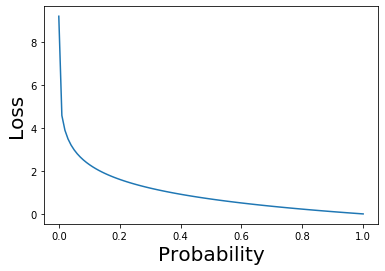

In [45]:
x = np.linspace(0.0001,1,100)
plt.plot(x,-np.log(x))
font = 20
plt.xlabel('Probability',fontsize = font)
plt.ylabel('Loss',fontsize = font)

In [46]:
test_loader =valloader
train_loader = trainloader

In [47]:
n_epochs = 4
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

### Defining function for the training procedure - similar to previous lesson!

In [48]:
def train_CNN(net,criterion,optimizer,epoch,trainloader):
    net.train() # When using dropout this is necessary! it states that we are on a training mode.
    for batch_idx, (data, target) in enumerate(trainloader):
        # gradient has to be manually set to zero because otherwise gradients are accumulated
        optimizer.zero_grad()
        # Calculates the output for some bach of figures
        output = net(data)
        # Calculates the loss
        loss = criterion(output, target)
        # This is where gradients are calculated (for the loss tensor)
        loss.backward()
        #And optimizes its weights here by some gradient decent like scheme
        optimizer.step()
        #Just to print how the progress is doing:
        if batch_idx % log_interval == 0:
            if batch_idx > 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(trainloader.dataset)))


### Defining function for testing

In [49]:
def test_CNN(net,criterion,testloader,batchsize=64,nsamples=10000):
    net.eval() # basically states that we are in evaluation mode. When using dropout necessary!
    test_loss = 0
    correct = 0
    flag_size = 0
    with torch.no_grad():
#     for data, target in testloader:
        for i, (data, target) in enumerate(testloader):
            output = net(data) # get predictions
            test_loss += criterion(output, target).item() # Sum over the losses 
            pred = output.data.max(1, keepdim=True)[1] # Get label with maximum probability
            correct += pred.eq(target.data.view_as(pred)).sum() #Comparing the true labels to the predicted labels
            if (i)*batchsize > nsamples: 
                flag_size = 1
                break
    if flag_size == 1:
        max_len = (i+1)*batchsize
    else:
        max_len = len(testloader.dataset)
    test_loss /= max_len
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, max_len,
    100. * correct / max_len))

In [50]:
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_CNN(network,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_CNN(network,criterion,trainloader)
    print('Performance on the test set:')
    test_CNN(network,criterion,valloader)

/Users/yani/anaconda3/envs/ML_IAP/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.033391
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.100126
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.007848
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.295429
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.100895
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.020448
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.092945
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.017056
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.093518

Training Time for one epoch (in minutes) = 0.5253950993220011
Performance on the train set:

Test set: Avg. loss: 0.0010, Accuracy: 9900/10112 (97.90%)

Performance on the test set:

Test set: Avg. loss: 0.0009, Accuracy: 9806/10000 (98.06%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.071377
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.020698
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.131862
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.021634
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.126126
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.015581
Train Ep

In [51]:
PATH = './MNIST_CNN_2Cycles.pth'
torch.save(network.state_dict(), PATH)

# If we want to load the network later:
# network.load_state_dict(torch.load(PATH))

In [52]:
n_epochs = 1 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_CNN(network,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_CNN(network,criterion,trainloader)
    print('Performance on the test set:')
    test_CNN(network,criterion,valloader)

/Users/yani/anaconda3/envs/ML_IAP/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.008252
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.026316
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.002409
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.010241
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.022855
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.015410
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.005624
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.034772
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.131404

Training Time for one epoch (in minutes) = 0.5496746500333151
Performance on the train set:

Test set: Avg. loss: 0.0005, Accuracy: 10010/10112 (98.99%)

Performance on the test set:

Test set: Avg. loss: 0.0007, Accuracy: 9860/10000 (98.60%)



In [53]:
# If we want to load the network:
# network.load_state_dict(torch.load(PATH))

###  Deterioration in the accuracy on test set after 3 epoch - we could:

- #### add batch normalization (which we learned about)

- #### Reduce learning rate (always worth trying)

- #### Use regularization - since we are overfitting


#### There are better schemes for the learning rate (I recommend the fastai course that suggest a scheme that starts with a very small learning rate, which is increased, and from some point is decreased again. 

## Visuzlization of the loss function

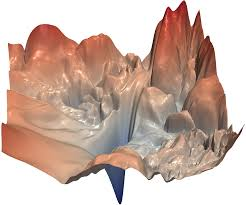

In [65]:
#Image taken from: https://papers.nips.cc/paper/7875-visualizing-the-loss-landscape-of-neural-nets.pdf
Image(filename='figs/Loss_function_vis_NN.jpeg', width=400)


## Task - reduce the learning rate and continue training for more epochs

In [54]:
#Your code should go here:


In [55]:
#Uncomment and run only after you changed the learning rate!


# n_epochs2 = 1
# for epoch in range(1, n_epochs + 1):
#     train_CNN(network,criterion,optimizer,epoch,trainloader)
#     print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
#     print('Performance on the train set:')
#     test_CNN(network,criterion,trainloader)
#     print('Performance on the test set:')
#     test_CNN(network,criterion,valloader)

### Comment: generally, , CNN is very helpful if there is translational invariance in the data (images is one of the data types where we have translational invariance). 

#### For results of the MNIST datasets from different papers and methods - see [here](https://paperswithcode.com/sota/image-classification-on-mnist)

/Users/yani/anaconda3/envs/ML_IAP/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


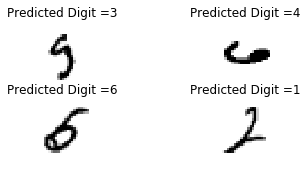

In [56]:
num_stop = 3
num_now =0 
for images,labels in valloader:
    if num_now > num_stop:
        break
    for i in range(len(labels)):
        if num_now > num_stop:
            break
        with torch.no_grad():
            img = images[i].unsqueeze(0)
            logps = network(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label != pred_label):
            num_now = num_now + 1
            plt.subplot(num_stop, 2, num_now)
            plt.axis('off')
            plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')
            title1 = 'Predicted Digit =' +str(probab.index(max(probab)))
            plt.title(title1)
#             plt.title('my random fig') 





### Number of parameters in convolutional layer

Consider a convolutional layer which takes “l” feature maps (e.g., 10 in our second convolutional layer) as the input and has “k” feature maps (20 in our second convolutional layer) as output. The filter size is “n*m” (5x5 in our second convolutional layer).
It is important to understand, that we don’t simply have a $5*5$ filter, but actually, we have $5*5*10$ filter, as our input has 10 dimensions. And as an output from second conv layer, we learn 20 different $5*5*10$ filters which total weights is $n*m*k*l$. Then there is a term called bias for each feature map. So, the total number of parameters are $(n*m*l+1)*k$ in the second layer - (10 * 5 * 5+1) *20.

For more details see [here](https://medium.com/@iamvarman/how-to-calculate-the-number-of-parameters-in-the-cnn-5bd55364d7ca)

# Normalizing Inputs

Normalizing the inputs speed up the training of a neural network.

For more reading why should we normalize inputs in NN's see these links [1](https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd) , [2](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/) , [3](https://www.jeremyjordan.me/batch-normalization/)

## BatchNormalization 

Normalize the activation values such that the hidden representation doesn’t vary drastically and also helps us to get improvement in the training speed.

The batch of RGB images has four dimensions — batch_size x channels x height x width. In the case of images, we normalize the batch over each channel. The class BatchNorm2d applies batch normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension).

In [57]:
class cnn_net_bn(nn.Module):
    def __init__(self):
        super(cnn_net_bn, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5,padding=2),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
            )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2))
#         self.conv2_drop = nn.Dropout2d() #regularization method to prevent overfitting. 
        self.fc1 = nn.Linear(7*7*20, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dense1_bn = nn.BatchNorm1d(7*7*20)
        self.dense2_bn = nn.BatchNorm1d(128)
    def forward(self, x):
        x = self.conv1(x) #F.max_pool2d(F.relu(self.conv1(x)),2)
        x = self.conv2(x)
        x = x.view(-1, 7*7*20)
        x = self.dense1_bn(x)
        x = self.fc1(x)
        x = self.dense2_bn(x)
        x = self.fc2(x)
        return F.log_softmax(x)

In [58]:
learning_rate = 0.003
cnnBN = cnn_net_bn()
optimizer = optim.Adam(cnnBN.parameters(), lr=learning_rate)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_CNN(cnnBN,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_CNN(cnnBN,criterion,trainloader)
    print('Performance on the test set:')
    test_CNN(cnnBN,criterion,valloader)

/Users/yani/anaconda3/envs/ML_IAP/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.223870
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.197132
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.075409
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.124750
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.029239
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.022928
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.053103
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.058268
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.115137

Training Time for one epoch (in minutes) = 0.9401063998540242
Performance on the train set:

Test set: Avg. loss: 0.0009, Accuracy: 9926/10112 (98.16%)

Performance on the test set:

Test set: Avg. loss: 0.0008, Accuracy: 9836/10000 (98.36%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.007623
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.100388
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.060410
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.177474
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.065574
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.076189
Train Ep

In [ ]:
### Task: Reduce learning rate and train for 2 more epochs!

#Solution cell
<!-- optimizer = optim.Adam(cnnBN.parameters(), lr=learning_rate/10)
n_epochs = 2
#Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_CNN(cnnBN,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_CNN(cnnBN,criterion,trainloader)
    print('Performance on the test set:')
    test_CNN(cnnBN,criterion,valloader) -->

In [118]:
PATH = './MNIST_CNN_bn2.pth'
torch.save(cnnBN.state_dict(), PATH)

# If we want to load the network later:
# cnnBN.load_state_dict(torch.load(PATH))



<All keys matched successfully>

# Regularization of Neural Networks

- weight decay (added in the optimizer part - see ?optim.Adam)
- Dropout (added in the definition of the network). 
- Data augmentation - will not do today (maybe next time). 
- Early stopping - this mean that we do not run many epochs

#### Weight decay

#### weight decay is usually defined as a term that’s added directly to the update rule.
Namely, to update a certain weight $w$ in the $i+1$ iteration, we would use a modified rule:

### $w_{i+1} = w_{i} - WD * w_{i} - LR *\frac{\partial L}{\partial w})$

#### In practice, this is almost identical to L_2 regularization, though there is some difference (e.g., see [here](https://bbabenko.github.io/weight-decay/))

Weight decay is one of the parameters of the optimizer - try ?torch.optim.SGD

In [59]:
learning_rate = 0.003
cnnBN_wd = cnn_net_bn()
optimizer = optim.Adam(cnnBN_wd.parameters(), lr=learning_rate,weight_decay=0.0003)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_CNN(cnnBN_wd,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_CNN(cnnBN_wd,criterion,trainloader)
    print('Performance on the test set:')
    test_CNN(cnnBN_wd,criterion,valloader)

/Users/yani/anaconda3/envs/ML_IAP/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.195976
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.149180
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.060722
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.053772
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.038283
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.046888
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.079762
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.114382
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.216277

Training Time for one epoch (in minutes) = 0.9063913027445475
Performance on the train set:

Test set: Avg. loss: 0.0011, Accuracy: 9908/10112 (97.98%)

Performance on the test set:

Test set: Avg. loss: 0.0012, Accuracy: 9772/10000 (97.72%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.098198
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.024303
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.038799
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.055549
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.059327
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.078592
Train Ep

In [60]:
learning_rate = 0.003
optimizer = optim.Adam(cnnBN_wd.parameters(), lr=learning_rate,weight_decay=0.0003)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_CNN(cnnBN_wd,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_CNN(cnnBN_wd,criterion,trainloader)
    print('Performance on the test set:')
    test_CNN(cnnBN_wd,criterion,valloader)

/Users/yani/anaconda3/envs/ML_IAP/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.045767
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.004656
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.067275
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.015892
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.051561
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.028734
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.118103
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.043817
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.002464

Training Time for one epoch (in minutes) = 0.9160769661267598
Performance on the train set:

Test set: Avg. loss: 0.0006, Accuracy: 10003/10112 (98.92%)

Performance on the test set:

Test set: Avg. loss: 0.0007, Accuracy: 9857/10000 (98.57%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.007769
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.030850
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.037648
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.095129
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.032487
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.012165
Train E

In [ ]:
PATH = './MNIST_CNN_bn4Cycles_wd.pth'
torch.save(cnnBN_wd.state_dict(), PATH)

## Task: change values of weight decay and see changes in the network performence

#### Dropout

By dropping a unit out, we mean temporarily removing it from the network while training, along with all its incoming and outgoing connections. 
See more details [here](http://jmlr.org/papers/v15/srivastava14a.html).
It is usually the most useful regularization that we can do in fully connected layers

In convolutional layers dropout makes less sense - see more discussion [here](https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html)


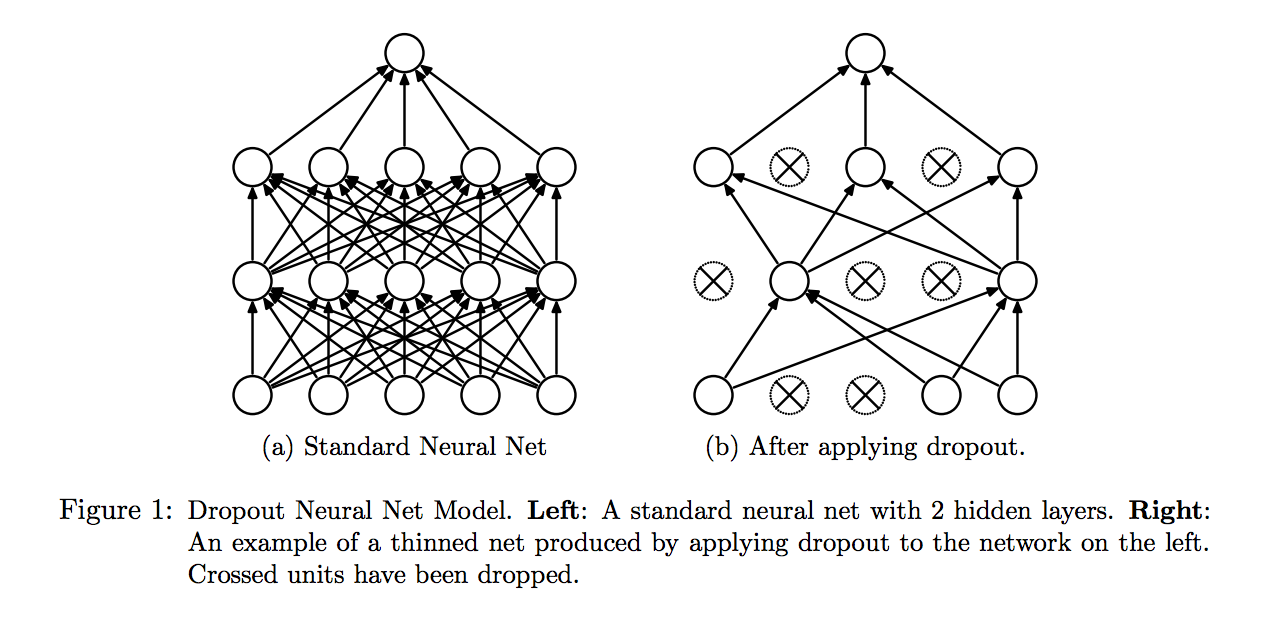

In [32]:
#Image taken from: http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
Image(filename='figs/Dropout_layer.png', width=700)




In [33]:
class cnn_net_bn_drop(nn.Module):
    def __init__(self):
        super(cnn_net_bn_drop, self).__init__()
        self.conv1 = nn.Sequential(
            nn.BatchNorm2d(10),
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
            )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2))
#         self.conv2_drop = nn.Dropout2d() #regularization method to prevent overfitting. 
        self.fc1 = nn.Linear(7*7*20, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dense1_bn = nn.BatchNorm1d(7*7*20)
        self.dense2_bn = nn.BatchNorm1d(128)
        self.lin_drop = nn.Dropout(0.2) #regularization method to prevent overfitting. 
    def forward(self, x):
        x = self.conv1(x) #F.max_pool2d(F.relu(self.conv1(x)),2)
        x = self.conv2(x)
        x = x.view(-1, 7*7*20)
        x = self.lin_drop(x)
        x = self.dense1_bn(x)
        x = self.fc1(x)
        x = self.lin_drop(x)
        x = self.dense2_bn(x)
        x = self.fc2(x)
        return F.log_softmax(x)


In [34]:
learning_rate = 0.003
cnnBN_dropout = cnn_net_bn_drop()
optimizer = optim.Adam(cnnBN_dropout.parameters(), lr=learning_rate)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_CNN(cnnBN_dropout,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_CNN(cnnBN_dropout,criterion,trainloader)
    print('Performance on the test set:')
    test_CNN(cnnBN_dropout,criterion,valloader)

/Users/yani/anaconda3/envs/ML_IAP/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.109803
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.175264
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.243792
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.124495
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.017793
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.086684
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.158006
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.199230
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.107929

Training Time for one epoch (in minutes) = 0.7930182655652364
Performance on the train set:

Test set: Avg. loss: 0.0006, Accuracy: 9991/10112 (98.80%)

Performance on the test set:

Test set: Avg. loss: 0.0007, Accuracy: 9840/10000 (98.40%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.067158
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.171699
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.025583
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.026771
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.076023
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.044961
Train Ep

## Reducing the learning rate

In [37]:
optimizer = optim.Adam(cnnBN_dropout.parameters(), lr=learning_rate/10)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_CNN(cnnBN_dropout,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_CNN(cnnBN_dropout,criterion,trainloader)
    print('Performance on the test set:')
    test_CNN(cnnBN_dropout,criterion,valloader)

/Users/yani/anaconda3/envs/ML_IAP/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.027286
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.012676
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.004622
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.001844
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.049256
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.055732
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.010185
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.002881
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.037213

Training Time for one epoch (in minutes) = 0.8881234288215637
Performance on the train set:

Test set: Avg. loss: 0.0002, Accuracy: 10062/10112 (99.51%)

Performance on the test set:

Test set: Avg. loss: 0.0004, Accuracy: 9927/10000 (99.27%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.009422
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.151183
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.005162
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.004608
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.006314
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.061935
Train E

## Task - change the dropout rate and see how the performence of the network changes. 

## Task - Combine weight decay and dropout together and see if you can improve performence even more